In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
# Step 1: Import the dataset
data = pd.read_csv("healthcare_providers.csv")

In [3]:
data

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,F,I,324 E BALTIMORE ST,NaN,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,NaN,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [4]:
# Step 2: Handle missing values (if any)
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                              

In [5]:
data.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                       object
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
Street Address 2 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                   

In [6]:
data[['First Name of the Provider','Middle Initial of the Provider', 'Credentials of the Provider', 'Gender of the Provider', 'Street Address 2 of the Provider']] = data[['First Name of the Provider','Middle Initial of the Provider', 'Credentials of the Provider', 'Gender of the Provider', 'Street Address 2 of the Provider']].fillna('')

In [7]:
data

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,,MD,M,I,5746 N BROADWAY ST,,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,,PT,F,I,324 E BALTIMORE ST,,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,,,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [8]:
# Step 3: Select features for anomaly detection
# Let's consider 'Number of Services' and 'Average Medicare Payment Amount' as relevant features for anomaly detection.
features = ['Number of Services', 'Average Medicare Payment Amount']
X = data[features]
data['Number of Services'] = data['Number of Services'].str.replace(',', '').astype(float)
data['Average Medicare Payment Amount'] = data['Average Medicare Payment Amount'].str.replace(',', '').astype(float)

In [9]:
# Step 4: Impute missing values for numerical features
# Assuming 'Number of Services' and 'Average Medicare Payment Amount' are numerical features, we'll fill NaN values with the mean.
data['Number of Services'].fillna(data['Number of Services'].mean(), inplace=True)
data['Average Medicare Payment Amount'].fillna(data['Average Medicare Payment Amount'].mean(), inplace=True)

In [10]:
# Step 5: Convert categorical variables (if any)
data = pd.get_dummies(data, columns=['Gender of the Provider', 'Entity Type of the Provider'], drop_first=True)

In [11]:
data

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,...,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_O
0,8774979,1891106191,UPADHYAYULA,SATYASREE,,M.D.,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,...,27.0,24,27,200.58777778,305.21111111,157.262222,160.90888889,True,False,False
1,3354385,1346202256,JONES,WENDY,P,M.D.,2950 VILLAGE DR,,FAYETTEVILLE,283043815.0,...,175.0,175,175,123.73,548.8,118.830000,135.31525714,True,False,False
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,...,32.0,13,32,90.65,155,64.439688,60.5959375,False,True,False
3,7594822,1770523540,FULLARD,JASPER,,MD,5746 N BROADWAY ST,,KANSAS CITY,641183998.0,...,20.0,18,20,3.5,5,3.430000,3.43,False,True,False
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,...,33.0,24,31,26.52,40,19.539394,19.057575758,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,,PT,324 E BALTIMORE ST,,WILMINGTON,604811236.0,...,20.0,20,20,85.3725,214,60.725500,62.2485,True,False,False
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,645 NW 4TH ST,,REDMOND,977561502.0,...,136.0,107,136,61.27,144.05147059,30.006176,37.040220588,True,False,False
99997,8927965,1902868185,VALENCIA,DANA,,M.D.,3009 N BALLAS RD,SUITE 202B,SAINT LOUIS,631312322.0,...,11.0,11,11,17.98,109.54545455,14.090000,14.62,False,True,False
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,,,2365 BOSTON POST RD,SUITE 201,LARCHMONT,105383500.0,...,12.0,12,12,30.54,65,29.930000,25.32,True,False,False


In [12]:
# Step 6: Select features for anomaly detection
features = ['Number of Services', 'Average Medicare Payment Amount']
X = data[features]

In [13]:
# Step 6: Select features for anomaly detection
features = ['Number of Services', 'Average Medicare Payment Amount']
X = data[features]

# Step 7: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the first few rows of the preprocessed data
print("Preprocessed Data:\n", pd.DataFrame(X_scaled, columns=features).head())

Preprocessed Data:
    Number of Services  Average Medicare Payment Amount
0           -0.085301                         0.400082
1           -0.025939                         0.207649
2           -0.083296                        -0.064687
3           -0.088109                        -0.370166
4           -0.082895                        -0.289505


In [14]:
#: Apply unsupervised anomaly detection algorithms
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_if = isolation_forest.fit_predict(X_scaled)
scores_if = -isolation_forest.decision_function(X_scaled)

In [ ]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
svm = OneClassSVM(nu=0.05)
outliers_svm = svm.fit_predict(X_train)
scores_svm = svm.decision_function(X_test)

In [ ]:
# One-Class SVM
# svm = OneClassSVM(nu=0.05)
# outliers_svm = svm.fit_predict(X_scaled)
# scores_svm = svm.decision_function(X_scaled)

In [15]:
# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(X_scaled)
scores_lof = -lof.negative_outlier_factor_

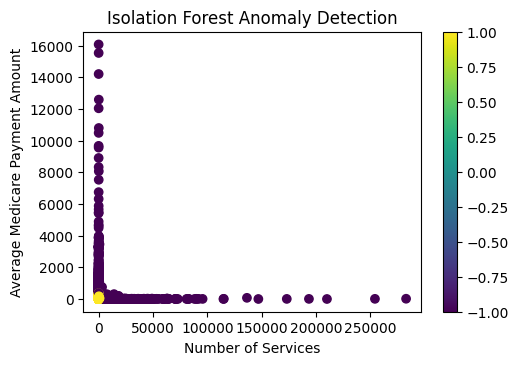

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(X['Number of Services'], X['Average Medicare Payment Amount'], c=outliers_if, cmap='viridis', label='Isolation Forest')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.title('Isolation Forest Anomaly Detection')
plt.colorbar()

In [18]:
# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 2)
# plt.scatter(X['Number of Services'], X['Average Medicare Payment Amount'], c=outliers_svm, cmap='coolwarm', marker='x', label='One-Class SVM')
# plt.xlabel('Number of Services')
# plt.ylabel('Average Medicare Payment Amount')
# plt.title('One-Class SVM Anomaly Detection')
# plt.colorbar()

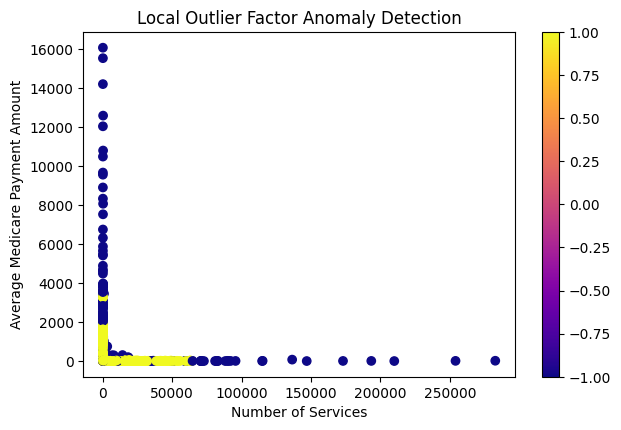

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
plt.scatter(X['Number of Services'], X['Average Medicare Payment Amount'], c=outliers_lof, cmap='plasma', label='Local Outlier Factor')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.title('Local Outlier Factor Anomaly Detection')
plt.colorbar()
plt.tight_layout()
plt.show()